# Deep Learning: Assignment 1. Cat, Dog, Car or Bike?

**Dataset:** You are provided with a dataset which contains more than 3000 pictures with either a cat, a dog, a motorbike or a car. The dataset has already been split in training, test and validation sets. Your task is to build and train a CNN which is able to recognize which object is depicted in the picture. To this end, you must use and change the code we presented during our tutorial on classifying cat and dog images. You should copy and unzip the dataset in your local directory (do not change the name of the directory), namely the same directory where this jupyter notebook is going to be stored. 

**Python and Keras version.** We recommend you to use Python 3.6 (there might be some incompatibility issues between keras and the most recent versions of Python). We also recommend to use TensorFlow 2.1.0 and Keras 2.3.1, which are the settings we used to test everything. You can find the documentation for keras at the following address https://keras.io/layers/convolutional/.

**What to submit:** You should post on moodle this jupyter notebook filled will all the answers to the questions, the Python code and the plots. Do not change any part of the code that is provided to you, unless explicitly asked. You should also post on moodle the model for question 5 (name of the model "modelQ5.h1"). The answers to the questions should be provided below at the end of the notebook. In case your model has size larger than 100MB please provide a link to Google Drive or other storage services. **Important**: For each question you will get 0 points if the code or any of the plots are missing or the code is not correct.

**GPU Farm**: You will have access to the HKU GPU farm to do this assignment. Additional info on how to use it is contained in a separate document provided with the assignement. Please use this only for questions 4 and 5.

**Image Size** You should use image size 32x32 for the first three questions. You can use higher resolutions for questions 4 and 5. We kindly ask you to use your machine whenever possible, in order to avoid the GPU farm to be overwhelmed. 



##### Question 1 (CNN Architecture) 

Define a CNN architecture with the following layers stacked on top of each other in the following order:
1. A convolutional layer with 32 5 × 5 filters. 
2. A max Pooling Layer with size 2 × 2.
3. A convolutional layer with 64 5 × 5 filters. 
4. A max Pooling Layer with size 2 × 2.
5. A convolutional layer with 64 3 × 3 filters. 
6. A max Pooling Layer with size 2 × 2.
7. A convolutional layer with 64 3 × 3 filters. 
7. A max Pooling Layer with size 2 × 2.
9. A dense layer with 256 units.
10. A dense layer with k units and softmax (aka cross entropy) loss function.

Use the sigmoid activation function for all layers but the last one which uses the softmax function. Use default values for the parameters which are not specified above.

a) [5pts] Determine the right value for k and write the value for k you use at the end of the notebook. Write the code to solve a) in the cell below


In [6]:
#documentation:https://keras.io/layers/convolutional/
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='sigmoid',
                        input_shape=(32, 32, 3)))


#write your own code for a) here
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()



ValueError: Negative dimension size caused by subtracting 3 from 1 for '{{node conv2d_17/convolution}} = Conv2D[T=DT_FLOAT, data_format="NHWC", dilations=[1, 1, 1, 1], explicit_paddings=[], padding="VALID", strides=[1, 1, 1, 1], use_cudnn_on_gpu=true](max_pooling2d_14/MaxPool, conv2d_17/convolution/ReadVariableOp)' with input shapes: [?,1,1,64], [3,3,64,64].

b) [5pts] The architecture defined above cannot be built because of an error. You should fix such an error without changing the number of convolutional, pooling or dense layers, the number of filters, the size of the filters, or the number of units. Write at the end of the notebook which strategy did you use and write the code to solve b) in the cell below:

In [7]:
#documentation:https://keras.io/layers/convolutional/
from keras import layers
from keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='sigmoid',
                        input_shape=(32, 32, 3)))


#write your own code for b) here
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (5, 5), activation='sigmoid'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='sigmoid'))
model.add(layers.Dense(4, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 5, 5, 64)          36928     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 2, 2, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 2, 2, 64)         

## Question 2 (Training a small CNN from scratch)

We are now considering a different CNN architecture specified in the code below. Fill the missing parts (there is a comment specifying which parts must be filled). After that train such a CNN using the following values for the parameters:

- loss function=crossentropy;
- optimizer RMSprop with learning rate = 0.1;
- metrics= accuracy;
- Batch size for the training/validation generators=20; 
- epochs=30.

Train the CNN and plot both the training/validation accuracy and training/validation loss as a function of the epochs. Write the code and report the plots in the cells below:

In [9]:
import os
from keras import layers
from keras import models
from keras import optimizers

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='sigmoid',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='sigmoid',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='sigmoid',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='sigmoid',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
# something is missing here 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='sigmoid'))
model.add(layers.Dense(4, activation='softmax')) #replace k with the corresponding value

model.compile( #fill this part ...
optimizer=optimizers.RMSprop(lr=1e-5),
              loss='categorical_crossentropy',
              metrics=['acc']
)

from keras.preprocessing.image import ImageDataGenerator

base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
    

Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/30
100/100 [==============================] - 56s 562ms/step - loss: 1.3815 - acc: 0.2882 - val_loss: 1.4102 - val_acc: 0.2905
Epoch 2/30
100/100 [==============================] - 8s 83ms/step - loss: 1.3802 - acc: 0.2889 - val_loss: 1.3942 - val_acc: 0.2884
Epoch 3/30
100/100 [==============================] - 10s 96ms/step - loss: 1.3799 - acc: 0.2832 - val_loss: 1.3719 - val_acc: 0.2915
Epoch 4/30
100/100 [==============================] - 12s 120ms/step - loss: 1.3776 - acc: 0.3000 - val_loss: 1.3323 - val_acc: 0.2864
Epoch 5/30
100/100 [==============================] - 8s 80ms/step - loss: 1.3818 - acc: 0.2849 - val_loss: 1.4386 - val_acc: 0.2925
Epoch 6/30
100/100 [==============================] - 9s 88ms/step - loss: 1.3804 - acc: 0.2902 - val_loss: 1.3590 - val_acc: 0.2980
Epoch 7/30
100/100 [==============================] - 8s 77ms/step - loss: 1.3778 - acc: 0.3015 - val_loss: 1.3444

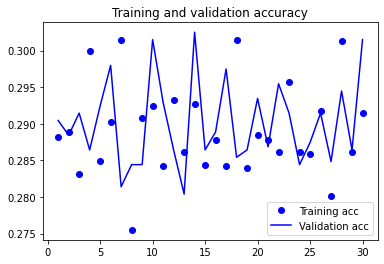

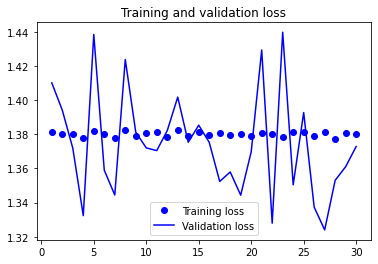

In [10]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

a) [5pts] What is the main problem for your model?

1. Overfitting
2. Underfitting

Write your answer below at the end of the notebook. 


b) [5pts] Without changing the learning rate, change one hyperparameter so as to improve the training error. 

Which hyperparameters did you change? Write your answer below at the end of the notebook. 

Plot both the training/validation accuracy and training/validation loss as a function of the epochs. Report the plots and the code in the cells below.


In [11]:
import os
from keras import layers
from keras import models
from keras import optimizers

# fill this part
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
# something is missing here 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax')) #replace k with the corresponding value

model.compile( #fill this part ...
optimizer=optimizers.RMSprop(lr=1e-5),
              loss='categorical_crossentropy',
              metrics=['acc']
)

from keras.preprocessing.image import ImageDataGenerator

base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
    


Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/30
100/100 [==============================] - 8s 84ms/step - loss: 1.3779 - acc: 0.2927 - val_loss: 1.3835 - val_acc: 0.2884
Epoch 2/30
100/100 [==============================] - 8s 77ms/step - loss: 1.3688 - acc: 0.2847 - val_loss: 1.3277 - val_acc: 0.3005
Epoch 3/30
100/100 [==============================] - 8s 77ms/step - loss: 1.3576 - acc: 0.2955 - val_loss: 1.3591 - val_acc: 0.2935
Epoch 4/30
100/100 [==============================] - 8s 82ms/step - loss: 1.3462 - acc: 0.2997 - val_loss: 1.2897 - val_acc: 0.2905
Epoch 5/30
100/100 [==============================] - 8s 81ms/step - loss: 1.3362 - acc: 0.3484 - val_loss: 1.3127 - val_acc: 0.3658
Epoch 6/30
100/100 [==============================] - 9s 89ms/step - loss: 1.3187 - acc: 0.3709 - val_loss: 1.3460 - val_acc: 0.3646
Epoch 7/30
100/100 [==============================] - 8s 77ms/step - loss: 1.2993 - acc: 0.4612 - val_loss: 1.2123 - va

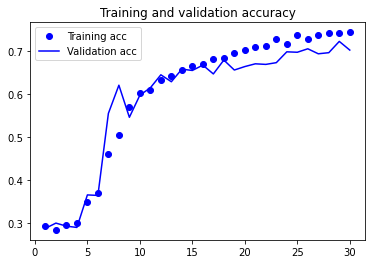

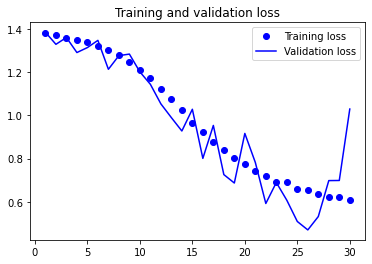

In [12]:

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Question 3 (Optimize the learning rate) 

a)[10pts] Determine an interval [a,b] of possible values for the learning rate, which is “wide enough”. In particular, you should try to guarantee that your interval contains an optimal value for the learning rate. At the same time the interval that you provided should not be too wide, due to efficiency reasons. In particular, your interval [a,b] should be such that $\frac{b}{a} \leq 10^5$.

b)[15pts] Provide a "good" value for the learning rate. In particular, the training error should become smaller than 0.1 within 30 epochs. 

Write your answers below at the end of the notebook.

Using a good value for the the learning rate, plot both the training/validation accuracy and training/validation as a function of the epochs. Report the plots below:


In [32]:
import os
from keras import layers
from keras import models
from keras import optimizers

# fill this part
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
# something is missing here 
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax')) #replace k with the corresponding value

model.compile( #fill this part ...
optimizer=optimizers.RMSprop(lr=0.0015),
              loss='categorical_crossentropy',
              metrics=['acc']
)

from keras.preprocessing.image import ImageDataGenerator

base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32), # very important: do not change this!
        batch_size=20,
        class_mode='categorical')

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)
    



Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.
Epoch 1/30
100/100 [==============================] - 8s 83ms/step - loss: 1.0443 - acc: 0.5238 - val_loss: 0.5920 - val_acc: 0.6814
Epoch 2/30
100/100 [==============================] - 8s 78ms/step - loss: 0.6732 - acc: 0.6985 - val_loss: 0.2647 - val_acc: 0.7688
Epoch 3/30
100/100 [==============================] - 8s 77ms/step - loss: 0.5276 - acc: 0.7525 - val_loss: 0.6441 - val_acc: 0.6683
Epoch 4/30
100/100 [==============================] - 8s 80ms/step - loss: 0.4439 - acc: 0.7885 - val_loss: 0.4962 - val_acc: 0.7638
Epoch 5/30
100/100 [==============================] - 7s 71ms/step - loss: 0.3822 - acc: 0.8276 - val_loss: 0.5691 - val_acc: 0.6312
Epoch 6/30
100/100 [==============================] - 8s 84ms/step - loss: 0.3294 - acc: 0.8554 - val_loss: 0.3750 - val_acc: 0.7980
Epoch 7/30
100/100 [==============================] - 8s 77ms/step - loss: 0.2931 - acc: 0.8765 - val_loss: 1.9399 - va

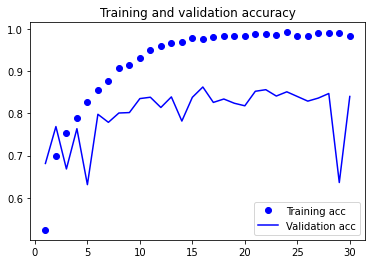

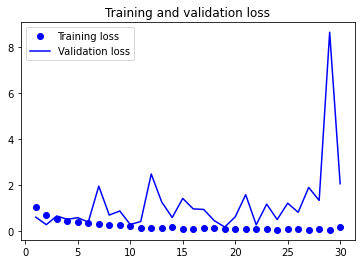

In [33]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


## Question 4 (Transfer Learning) [25pts]

Use the VGG16 as feature extractor with data augmentation (i.e. remove the top layer and freeze the VGGnet). Plot both the training/validation accuracy and training/validation as a function of the epochs. Report the plots and the code in the cells below. You should try to achieve a validation accuracy of at least 96\%. Report the accuracy of your model on the test set. 

Write the answers below at the end of the notebook. 


In [45]:
import os
from keras import layers
from keras import models
from keras import optimizers

# fill this part
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(32, 32, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))

conv_base.trainable = False
model.summary()

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=20,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(32, 32),
        batch_size=20,
        class_mode='categorical')
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])




Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_23 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_45 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_46 (Dense)             (None, 4)                 2052      
Total params: 14,979,396
Trainable params: 264,708
Non-trainable params: 14,714,688
_________________________________________________________________
Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.


In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

Epoch 1/30
100/100 [==============================] - 11s 108ms/step - loss: 1.3863 - acc: 0.3424 - val_loss: 1.1995 - val_acc: 0.4513
Epoch 2/30
100/100 [==============================] - 10s 96ms/step - loss: 1.2511 - acc: 0.4892 - val_loss: 1.1850 - val_acc: 0.5739
Epoch 3/30
100/100 [==============================] - 9s 95ms/step - loss: 1.1900 - acc: 0.5288 - val_loss: 1.0807 - val_acc: 0.5658
Epoch 4/30
100/100 [==============================] - 10s 98ms/step - loss: 1.1258 - acc: 0.5799 - val_loss: 0.9834 - val_acc: 0.6151
Epoch 5/30
100/100 [==============================] - 9s 89ms/step - loss: 1.1059 - acc: 0.5789 - val_loss: 1.0740 - val_acc: 0.5869
Epoch 6/30
100/100 [==============================] - 10s 97ms/step - loss: 1.0611 - acc: 0.5960 - val_loss: 0.8996 - val_acc: 0.6364
Epoch 7/30
100/100 [==============================] - 9s 90ms/step - loss: 1.0426 - acc: 0.6000 - val_loss: 0.9926 - val_acc: 0.6291
Epoch 8/30
100/100 [==============================] - 10s 96ms/s

## Question 5 (Open Question) [25pts]

Use any of the techniques we saw during our course so as to improve the validation accuracy of your CNN. Plot both the training/validation accuracy and training/validation as a function of the epochs. Report the plots and the code in the cells below. You should try to achieve a validation accuracy of at least 98\% and in any case better than the validation accuracy provided in question 4. Report the accuracy of your model on the test set. 

Write the answers below at the end of the notebook. Your model should have max size of 300Mb. Submit your model on moodle.

In [ ]:
import os
from keras import layers
from keras import models
from keras import optimizers

# fill this part


model.save('modelQ5.h1') #important do not change the name of the model

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Answers

Write your answers next to the corresponding question (same line).

Question 1
* a) What is the right value of k? 4
* b) How did you fix the error in the architecture? add padding to maintain same size as previous layer

Question 2
* a) There was a problem of underfitting or overfitting? Underfitting
* b) Which hyperparameter did you change? use relu as activation function, instead of sigmoid, to gradient vanish problem

Question 3
* a) which interval for the learning rate did you consider? [0.0001, 0.01]
* b) which value for the learning rate did you consider? 0.001

Question 4
* a) what is the validation accuracy of your model?
* b) what is the test accuracy of your model?

Question 5
* a) what is the validation accuracy of your model?
* b) what is the test accuracy of your model?


